In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path = '/content/drive/MyDrive/comp562_final_project/Sarcasm_Detection/train-balanced-sarcasm.csv'
df = pd.read_csv(path)

In [ ]:
#Data preprocessing
df.dropna(subset=['comment'], inplace=True)
df['comment'] = df['comment'].str.lower()
df['comment'] = df['comment'].str.replace('[^\w\s]','')

<ipython-input-4-42655822088c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment'] = df['comment'].str.replace('[^\w\s]','')


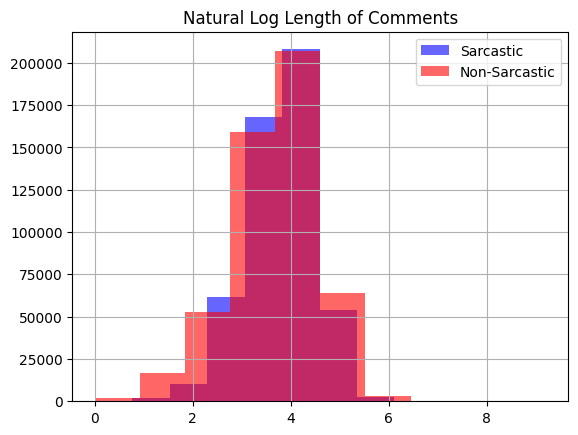

In [ ]:
df['log_comment'] = df['comment'].apply(lambda text: np.log1p(len(text)))
df[df['label']==1]['log_comment'].hist(alpha=0.6,label='Sarcastic', color = 'blue')
df[df['label']==0]['log_comment'].hist(alpha=0.6,label='Non-Sarcastic', color = 'red')
plt.legend()
plt.title('Natural Log Length of Comments')
plt.show()

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional, GRU, SimpleRNN
from tensorflow.keras.layers import Dense, Dropout
from keras.preprocessing import sequence
from keras.preprocessing import text
from keras.layers import Conv1D, Flatten,MaxPooling1D
from keras.preprocessing import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split

In [ ]:
df.reset_index(drop = True, inplace = True)
corpus = [df['comment'][i] for i in range(len(df))]
print(len(corpus))
voc_size=5000

onehot_=[one_hot(words,voc_size)for words in corpus] 

max_sent_length = 30

embedded_docs=pad_sequences(onehot_,padding='pre',maxlen=max_sent_length)
    
embedding_vector_features=40

X_final=np.array(embedded_docs)
y_final=np.array(df['label'])

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_final, y_final, test_size=0.2)

1010773


In [ ]:
lstm_model=Sequential()
lstm_model.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
lstm_model.add(Dropout(0.3))
lstm_model.add(Bidirectional(LSTM(128)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Flatten())
lstm_model.add(Dense(1,activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_lstm = lstm_model.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),epochs=10,batch_size=64) #21min 25s 0.7390

Epoch 1/10
12635/12635 [==============================] - 164s 12ms/step - loss: 0.5873 - accuracy: 0.6846 - val_loss: 0.5666 - val_accuracy: 0.7015
Epoch 2/10
12635/12635 [==============================] - 129s 10ms/step - loss: 0.5633 - accuracy: 0.7058 - val_loss: 0.5594 - val_accuracy: 0.7074
Epoch 3/10
12635/12635 [==============================] - 117s 9ms/step - loss: 0.5531 - accuracy: 0.7130 - val_loss: 0.5588 - val_accuracy: 0.7097
Epoch 4/10
12635/12635 [==============================] - 117s 9ms/step - loss: 0.5452 - accuracy: 0.7191 - val_loss: 0.5534 - val_accuracy: 0.7127
Epoch 5/10
12635/12635 [==============================] - 115s 9ms/step - loss: 0.5387 - accuracy: 0.7241 - val_loss: 0.5527 - val_accuracy: 0.7140
Epoch 6/10
12635/12635 [==============================] - 119s 9ms/step - loss: 0.5334 - accuracy: 0.7283 - val_loss: 0.5533 - val_accuracy: 0.7144
Epoch 7/10
12635/12635 [==============================] - 119s 9ms/step - loss: 0.5284 - accuracy: 0.7319 - va

In [ ]:
lstm_model_smax=Sequential()
lstm_model_smax.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
lstm_model_smax.add(Dropout(0.3))
lstm_model_smax.add(Bidirectional(LSTM(128, return_sequences=True)))
lstm_model_smax.add(Bidirectional(LSTM(128)))
lstm_model_smax.add(Dropout(0.3))
lstm_model_smax.add(Flatten())
lstm_model_smax.add(Dense(1,activation='sigmoid'))
lstm_model_smax.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
lstm_model_smax.summary()
history_lstm_smax = lstm_model_smax.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),epochs=10,batch_size=64) #31 min 0.7447

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 40)            200000    
                                                                 
 dropout_2 (Dropout)         (None, 30, 40)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 30, 256)          173056    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 flatten_1 (Flatten)         (None, 256)              

In [ ]:
def plot_graphs(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Accuracy")
    ax1.legend(['accuracy', 'val_accuracy'])

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Loss")
    ax2.legend(['loss', 'val_loss'])

    plt.show()

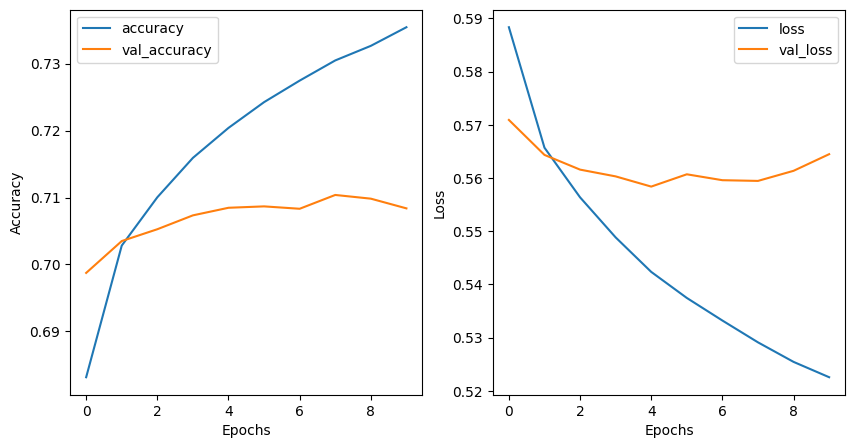

In [ ]:
import matplotlib.pyplot as plt

plot_graphs(history_lstm)

In [ ]:
#GRU
gru_model=Sequential()
gru_model.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
gru_model.add(Dropout(0.3))
gru_model.add(Bidirectional(GRU(128)))
gru_model.add(Dropout(0.3))
gru_model.add(Flatten())
gru_model.add(Dense(1,activation='sigmoid'))
gru_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history_gru = gru_model.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),epochs=10,batch_size=64) #21min26s  0.7350

Epoch 1/10
12635/12635 [==============================] - 155s 12ms/step - loss: 0.5867 - accuracy: 0.6847 - val_loss: 0.5671 - val_accuracy: 0.7012
Epoch 2/10
12635/12635 [==============================] - 121s 10ms/step - loss: 0.5631 - accuracy: 0.7054 - val_loss: 0.5590 - val_accuracy: 0.7082
Epoch 3/10
12635/12635 [==============================] - 129s 10ms/step - loss: 0.5529 - accuracy: 0.7136 - val_loss: 0.5585 - val_accuracy: 0.7081
Epoch 4/10
12635/12635 [==============================] - 116s 9ms/step - loss: 0.5456 - accuracy: 0.7192 - val_loss: 0.5538 - val_accuracy: 0.7131
Epoch 5/10
12635/12635 [==============================] - 124s 10ms/step - loss: 0.5396 - accuracy: 0.7243 - val_loss: 0.5532 - val_accuracy: 0.7135
Epoch 6/10
12635/12635 [==============================] - 116s 9ms/step - loss: 0.5353 - accuracy: 0.7275 - val_loss: 0.5531 - val_accuracy: 0.7140
Epoch 7/10
12635/12635 [==============================] - 114s 9ms/step - loss: 0.5316 - accuracy: 0.7306 - 

In [ ]:
#GRU
gru_model_2=Sequential()
gru_model_2.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
gru_model_2.add(Dropout(0.3))
gru_model_2.add(Bidirectional(GRU(128, return_sequences=True)))
gru_model_2.add(Bidirectional(GRU(128)))
gru_model_2.add(Dropout(0.3))
gru_model_2.add(Flatten())
gru_model_2.add(Dense(1,activation='sigmoid'))
gru_model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history_gru_2 = gru_model_2.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),epochs=10,batch_size=64) #29min 41s 0.7305

Epoch 1/10
12635/12635 [==============================] - 207s 16ms/step - loss: 0.5852 - accuracy: 0.6862 - val_loss: 0.5647 - val_accuracy: 0.7031
Epoch 2/10
12635/12635 [==============================] - 177s 14ms/step - loss: 0.5618 - accuracy: 0.7068 - val_loss: 0.5587 - val_accuracy: 0.7100
Epoch 3/10
12635/12635 [==============================] - 178s 14ms/step - loss: 0.5512 - accuracy: 0.7148 - val_loss: 0.5548 - val_accuracy: 0.7122
Epoch 4/10
12635/12635 [==============================] - 170s 13ms/step - loss: 0.5438 - accuracy: 0.7207 - val_loss: 0.5528 - val_accuracy: 0.7133
Epoch 5/10
12635/12635 [==============================] - 180s 14ms/step - loss: 0.5382 - accuracy: 0.7254 - val_loss: 0.5532 - val_accuracy: 0.7137
Epoch 6/10
12635/12635 [==============================] - 171s 14ms/step - loss: 0.5339 - accuracy: 0.7284 - val_loss: 0.5519 - val_accuracy: 0.7150
Epoch 7/10
12635/12635 [==============================] - 173s 14ms/step - loss: 0.5314 - accuracy: 0.7300

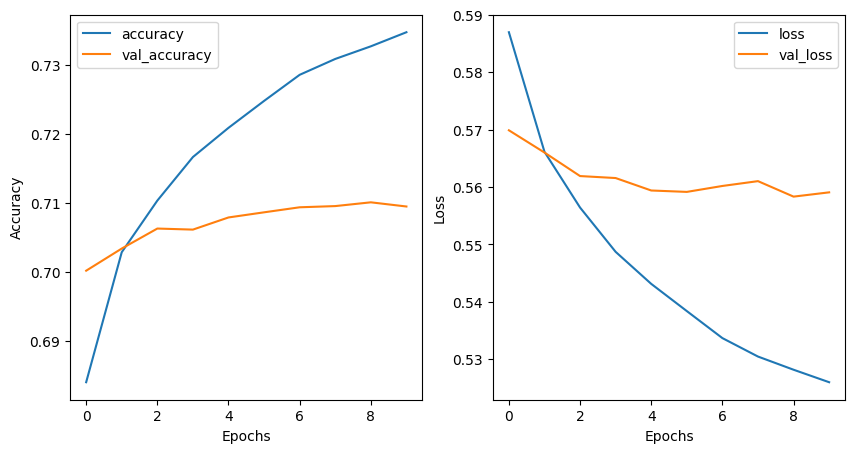

In [ ]:
plot_graphs(history_gru)

In [ ]:
text = "Jesus, and you wonder why you're still single!"
seq = [one_hot(text,voc_size)]
seq_pad=pad_sequences(seq,padding='pre',maxlen=max_sent_length)
seq_final=np.array(seq_pad)

pred = lstm_model_smax.predict(seq_final)

print(pred)

1/1 [==============================] - 2s 2s/step
[[0.5836708]]


In [ ]:
lstm=Sequential()
lstm.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
lstm.add(Dropout(0.3))
lstm.add(LSTM(128))
lstm.add(Dropout(0.3))
lstm.add(Flatten())
lstm.add(Dense(1,activation='sigmoid'))
lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history_lstm = lstm.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),epochs=10,batch_size=64) # 16min 23s 0.7385

Epoch 1/10
12635/12635 [==============================] - 137s 11ms/step - loss: 0.5879 - accuracy: 0.6841 - val_loss: 0.5690 - val_accuracy: 0.7015
Epoch 2/10
12635/12635 [==============================] - 95s 8ms/step - loss: 0.5633 - accuracy: 0.7055 - val_loss: 0.5601 - val_accuracy: 0.7076
Epoch 3/10
12635/12635 [==============================] - 93s 7ms/step - loss: 0.5534 - accuracy: 0.7129 - val_loss: 0.5564 - val_accuracy: 0.7103
Epoch 4/10
12635/12635 [==============================] - 93s 7ms/step - loss: 0.5457 - accuracy: 0.7185 - val_loss: 0.5545 - val_accuracy: 0.7123
Epoch 5/10
12635/12635 [==============================] - 94s 7ms/step - loss: 0.5394 - accuracy: 0.7235 - val_loss: 0.5540 - val_accuracy: 0.7136
Epoch 6/10
12635/12635 [==============================] - 94s 7ms/step - loss: 0.5336 - accuracy: 0.7277 - val_loss: 0.5525 - val_accuracy: 0.7143
Epoch 7/10
12635/12635 [==============================] - 92s 7ms/step - loss: 0.5292 - accuracy: 0.7309 - val_loss:

In [ ]:
lstm_2=Sequential()
lstm_2.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
lstm_2.add(Dropout(0.3))
lstm_2.add(LSTM(128, return_sequences=True))
lstm_2.add(LSTM(128))
lstm_2.add(Dropout(0.3))
lstm_2.add(Flatten())
lstm_2.add(Dense(1,activation='sigmoid'))
lstm_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history_lstm_2 = lstm_2.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),epochs=10,batch_size=64) #21min 26s 0.7430

Epoch 1/10
12635/12635 [==============================] - 164s 13ms/step - loss: 0.5867 - accuracy: 0.6852 - val_loss: 0.5713 - val_accuracy: 0.6993
Epoch 2/10
12635/12635 [==============================] - 121s 10ms/step - loss: 0.5626 - accuracy: 0.7060 - val_loss: 0.5591 - val_accuracy: 0.7082
Epoch 3/10
12635/12635 [==============================] - 122s 10ms/step - loss: 0.5515 - accuracy: 0.7143 - val_loss: 0.5543 - val_accuracy: 0.7117
Epoch 4/10
12635/12635 [==============================] - 124s 10ms/step - loss: 0.5426 - accuracy: 0.7214 - val_loss: 0.5539 - val_accuracy: 0.7137
Epoch 5/10
12635/12635 [==============================] - 122s 10ms/step - loss: 0.5353 - accuracy: 0.7265 - val_loss: 0.5498 - val_accuracy: 0.7154
Epoch 6/10
12635/12635 [==============================] - 123s 10ms/step - loss: 0.5291 - accuracy: 0.7312 - val_loss: 0.5522 - val_accuracy: 0.7157
Epoch 7/10
12635/12635 [==============================] - 122s 10ms/step - loss: 0.5239 - accuracy: 0.7354

In [ ]:
gru=Sequential()
gru.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
gru.add(Dropout(0.3))
gru.add(GRU(128, return_sequences=True))
gru.add(GRU(128))
gru.add(Dropout(0.3))
gru.add(Flatten())
gru.add(Dense(1,activation='sigmoid'))
gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history_gru = gru.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),epochs=10,batch_size=64) #21min 0.7390

Epoch 1/10
12635/12635 [==============================] - 156s 12ms/step - loss: 0.5828 - accuracy: 0.6889 - val_loss: 0.5657 - val_accuracy: 0.7027
Epoch 2/10
12635/12635 [==============================] - 124s 10ms/step - loss: 0.5598 - accuracy: 0.7087 - val_loss: 0.5577 - val_accuracy: 0.7088
Epoch 3/10
12635/12635 [==============================] - 123s 10ms/step - loss: 0.5499 - accuracy: 0.7163 - val_loss: 0.5557 - val_accuracy: 0.7094
Epoch 4/10
12635/12635 [==============================] - 122s 10ms/step - loss: 0.5419 - accuracy: 0.7221 - val_loss: 0.5532 - val_accuracy: 0.7131
Epoch 5/10
12635/12635 [==============================] - 122s 10ms/step - loss: 0.5362 - accuracy: 0.7267 - val_loss: 0.5523 - val_accuracy: 0.7131
Epoch 6/10
12635/12635 [==============================] - 121s 10ms/step - loss: 0.5310 - accuracy: 0.7300 - val_loss: 0.5506 - val_accuracy: 0.7132
Epoch 7/10
12635/12635 [==============================] - 120s 10ms/step - loss: 0.5270 - accuracy: 0.7331

In [ ]:
gru_1=Sequential()
gru_1.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
gru_1.add(Dropout(0.3))
gru_1.add(GRU(128))
gru_1.add(Dropout(0.3))
gru_1.add(Flatten())
gru_1.add(Dense(1,activation='sigmoid'))
gru_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history_gru_1 = gru_1.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),epochs=10,batch_size=64) #16min 27s 0.7371

Epoch 1/10
12635/12635 [==============================] - 139s 10ms/step - loss: 0.5835 - accuracy: 0.6874 - val_loss: 0.5668 - val_accuracy: 0.7014
Epoch 2/10
12635/12635 [==============================] - 91s 7ms/step - loss: 0.5620 - accuracy: 0.7063 - val_loss: 0.5608 - val_accuracy: 0.7064
Epoch 3/10
12635/12635 [==============================] - 94s 7ms/step - loss: 0.5518 - accuracy: 0.7145 - val_loss: 0.5564 - val_accuracy: 0.7087
Epoch 4/10
12635/12635 [==============================] - 90s 7ms/step - loss: 0.5451 - accuracy: 0.7199 - val_loss: 0.5555 - val_accuracy: 0.7101
Epoch 5/10
12635/12635 [==============================] - 91s 7ms/step - loss: 0.5388 - accuracy: 0.7245 - val_loss: 0.5547 - val_accuracy: 0.7113
Epoch 6/10
12635/12635 [==============================] - 88s 7ms/step - loss: 0.5346 - accuracy: 0.7279 - val_loss: 0.5534 - val_accuracy: 0.7131
Epoch 7/10
12635/12635 [==============================] - 91s 7ms/step - loss: 0.5305 - accuracy: 0.7308 - val_loss:

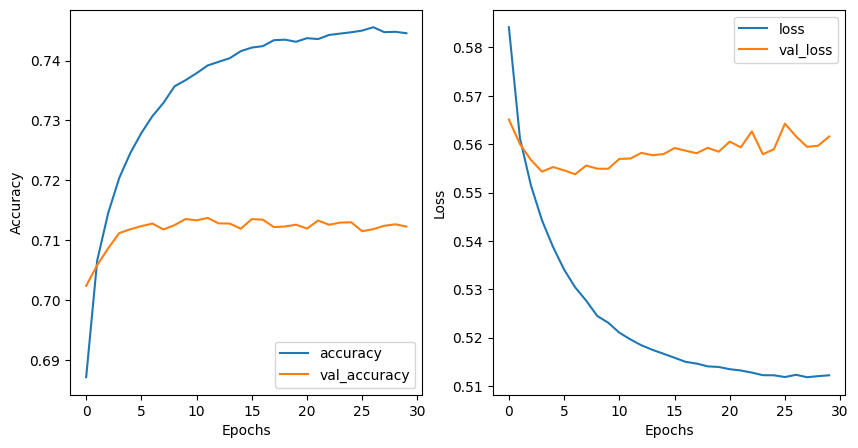

In [ ]:
import matplotlib.pyplot as plt

plot_graphs(history_gru_1)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 30, 40)            200000    
                                                                 
 dropout_28 (Dropout)        (None, 30, 40)            0         
                                                                 
 bidirectional_26 (Bidirecti  (None, 30, 256)          173056    
 onal)                                                           
                                                                 
 bidirectional_27 (Bidirecti  (None, 256)              394240    
 onal)                                                           
                                                                 
 dropout_29 (Dropout)        (None, 256)               0         
                                                                 
 flatten_16 (Flatten)        (None, 256)             

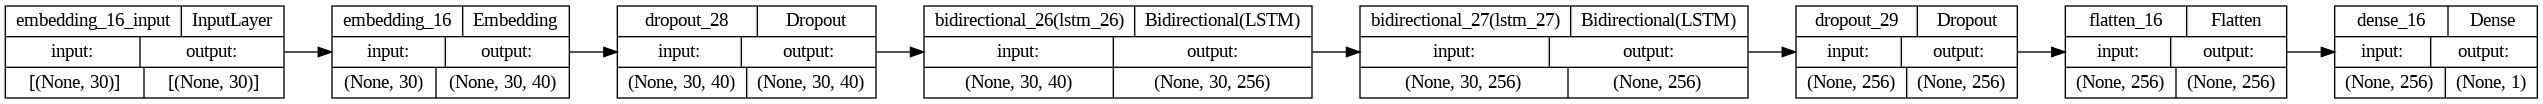

In [ ]:
from keras.utils.vis_utils import plot_model

lstm_model_smax=Sequential()
lstm_model_smax.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
lstm_model_smax.add(Dropout(0.3))
lstm_model_smax.add(Bidirectional(LSTM(128, return_sequences=True)))
lstm_model_smax.add(Bidirectional(LSTM(128)))
lstm_model_smax.add(Dropout(0.3))
lstm_model_smax.add(Flatten())
lstm_model_smax.add(Dense(1,input_shape=(256,),activation='sigmoid'))
lstm_model_smax.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
lstm_model_smax.summary()

plot_model(lstm_model_smax, show_shapes=True, show_layer_names=True, rankdir="LR",)

In [ ]:
#Data visualization
path = '/content/drive/MyDrive/comp562_final_project/Sarcasm_Detection/train-balanced-sarcasm.csv'
df = pd.read_csv(path)

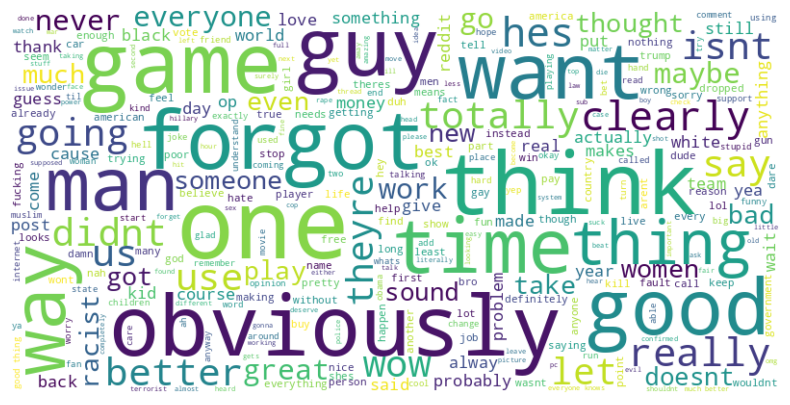

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Filter the DataFrame to only include rows with label == 1
df_filtered = df[df['label'] == 1]

# Concatenate all comments into a single string
comments = ' '.join(df_filtered['comment'])

modal_verbs = ['can', 'could', 'may', 'might', 'shall', 'should', 'will', 'would', 'must', 'yeah', 'well', 'right', 
               'thats', 'ye', 'im', 'fuck', 'shit', 'people', 'ho', 'theyll', 'melania', 'cant', 'dont',
               'make', 'know', 'yes', 'sure', 'need', 'now', 'mean', 'see', 'u', 'youre', 'oh', 'look']
stopwords = set(STOPWORDS)
stopwords.update(modal_verbs)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords = stopwords,
                      max_words = 300, max_font_size = 100).generate(comments)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

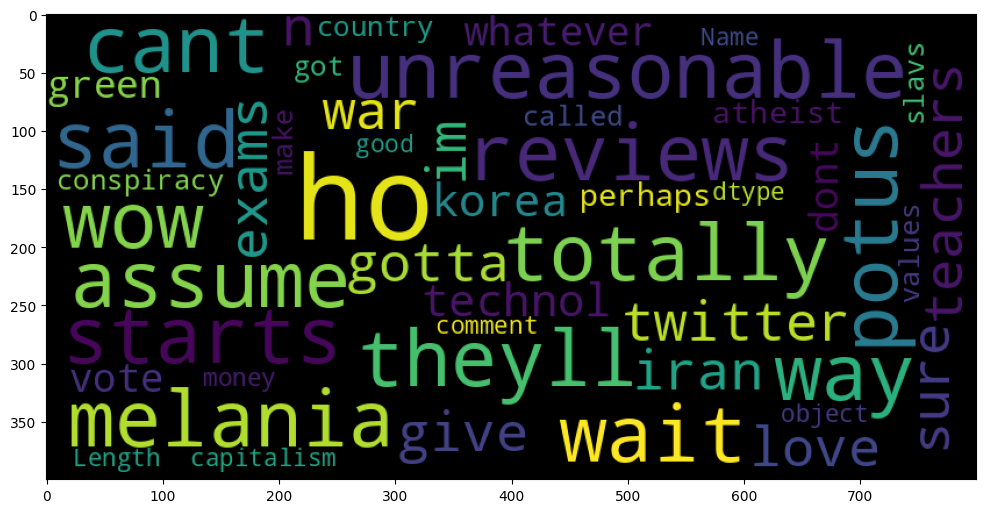

In [ ]:
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud.generate(str(df.loc[df['label'] == 1, 'comment']))

plt.imshow(wordcloud);

In [ ]:
lstm_model_smax=Sequential()
lstm_model_smax.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
lstm_model_smax.add(Dropout(0.3))
lstm_model_smax.add(Bidirectional(LSTM(128, return_sequences=True)))
lstm_model_smax.add(Bidirectional(LSTM(128)))
lstm_model_smax.add(Dropout(0.3))
lstm_model_smax.add(Flatten())
lstm_model_smax.add(Dense(1,activation='sigmoid'))
lstm_model_smax.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
lstm_model_smax.summary()
history_lstm_smax = lstm_model_smax.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),epochs=10,batch_size=64)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 30, 40)            200000    
                                                                 
 dropout_30 (Dropout)        (None, 30, 40)            0         
                                                                 
 bidirectional_28 (Bidirecti  (None, 30, 256)          173056    
 onal)                                                           
                                                                 
 bidirectional_29 (Bidirecti  (None, 256)              394240    
 onal)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 256)               0         
                                                                 
 flatten_17 (Flatten)        (None, 256)             

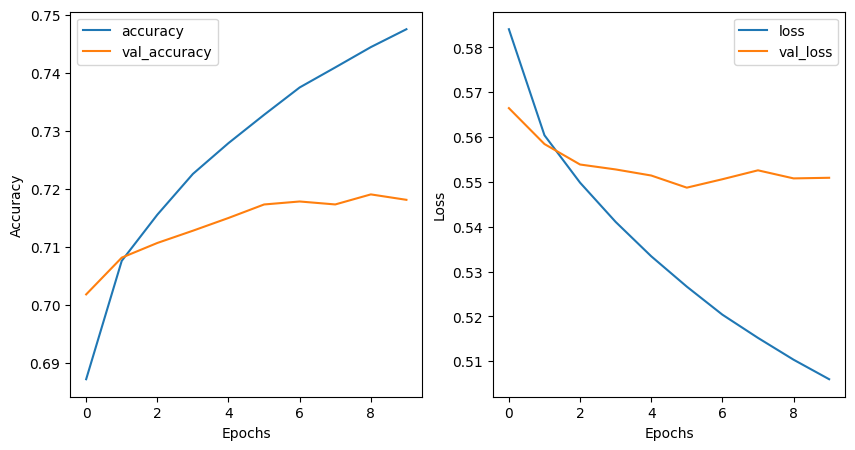

In [ ]:
import matplotlib.pyplot as plt

plot_graphs(history_lstm_smax)